# Install Package

In [ ]:
!pip install feature_engine
!pip install dython
!pip install matplotlib==3.1.3

# Import Library

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.cm as cmap
import matplotlib.colors as mpl_colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import numpy as np
from rich import print
import numpy as np
from feature_engine.encoding import RareLabelEncoder
import math
import matplotlib.ticker as ticker

def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

cluster_colors_hex = ['#5dfdcbff', '#7cc6feff', '#f4faffff', '#fb3640ff', '#d72483ff']
cluster_colors_rgb = [hex_to_rgb(x) for x in cluster_colors_hex]
cmap = mpl_colors.ListedColormap(cluster_colors_rgb)
colors = cmap.colors
bg_color= '#3a506bff'

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': bg_color,
    'axes.facecolor': bg_color,
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.titlecolor': 'white',
    'text.color': 'white'
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(cluster_colors_hex),
    rc=custom_params
)

# Read Data

In [ ]:
charts_df = pd.read_csv('../input/spotify-top-chart-songs-2022/spotify_top_charts_22.csv')

# Deskripsi Variabel


1. `uri`: Identitas unik dari lagu, Anda dapat paste `uri` di dalam kotak pencarian spotify dan lagu akan ditampilkan.
1. `artist_name`: Nama artis, jika lagu tersebut menampilkan artis lain, maka akan ditambahkan di sini.
1. `track_names`:Nama trek. Artis unggulan juga termasuk dalam bidang ini.
1. `peak_rank` Peringkat tertinggi di tangga lagu.
1. `weeks_on_chart`
1. `danceability`: Danceability menjelaskan seberapa cocok suatu trek untuk menari berdasarkan kombinasi elemen musik termasuk tempo, stabilitas ritme, kekuatan ketukan, dan keteraturan keseluruhan. Nilai 0,0 adalah yang paling tidak dapat ditarikan dan 1.0 adalah yang paling dapat ditarikan.
1. `energy`: Ukuran persepsi intensitas dan aktivitas. Biasanya, trek energik terasa cepat, keras, dan berisik.
1. `key`: Letak kunci trek. Integer memetakan nada menggunakan notasi Kelas Nada standar. Misalnya. 0 = C, 1 = C♯/D♭, 2 = D, dan seterusnya. Jika tidak ada kunci yang terdeteksi, nilainya -1.
1. `loudness`: Kenyaringan keseluruhan trek dalam desibel (dB)
1. `mode`: Mode menunjukkan modalitas (mayor -1- atau minor -0-) trek.
1. `speechiness`: Speechiness mendeteksi keberadaan kata-kata yang diucapkan di trek. Nilai di atas 0,66 menjelaskan trek yang mungkin seluruhnya terbuat dari kata-kata yang diucapkan. Nilai antara 0,33 dan 0,66 menjelaskan trek yang mungkin berisi musik dan ucapan, baik dalam bagian atau lapisan, termasuk kasus seperti musik rap.
1. `acousticness`: Ukuran keyakinan dari 0,0 hingga 1,0 apakah lagu tersebut akustik. 1.0 menunjukkan keyakinan tinggi bahwa lagu tersebut adalah akustik.
1. `instrumentalness`: Memprediksi apakah trek tidak berisi vokal. Bunyi "Ooh" dan "aah" diperlakukan sebagai instrumen dalam konteks ini. Nilai di atas 0,5 dimaksudkan untuk mewakili trek instrumental, tetapi kepercayaan lebih tinggi karena nilainya mendekati 1,0.
1. `liveness`: Mendeteksi kehadiran penonton dalam rekaman. Nilai keaktifan yang lebih tinggi menunjukkan kemungkinan yang lebih tinggi bahwa trek ditampilkan secara langsung. Nilai di atas 0,8 memberikan kemungkinan kuat bahwa trek tersebut aktif.
1. `tempo`: Perkiraan tempo lagu secara keseluruhan dalam ketukan per menit (BPM). Dalam terminologi musik, tempo adalah kecepatan atau kecepatan dari suatu karya tertentu dan berasal langsung dari durasi ketukan rata-rata.
1. `time_signature`:Perkiraan tanda tangan waktu. Tanda birama (meter) adalah konvensi notasi untuk menentukan berapa banyak ketukan di setiap birama (atau birama). Tanda birama berkisar dari 3 hingga 7 yang menunjukkan tanda birama "3/4", hingga "7/4".
1. `duration_ms`: Durasi trek dalam milidetik.




# Artist

1. Pisahkan artis dengan tanda koma
2. Kelompokkan artis yang jarang menggunakan [RareLabelEncoder](https://feature-engine.readthedocs.io/en/latest/api_doc/encoding/RareLabelEncoder.html?highlight=rarelabelencoder)
3. Plot jumlah lagu yang melibatkan artis

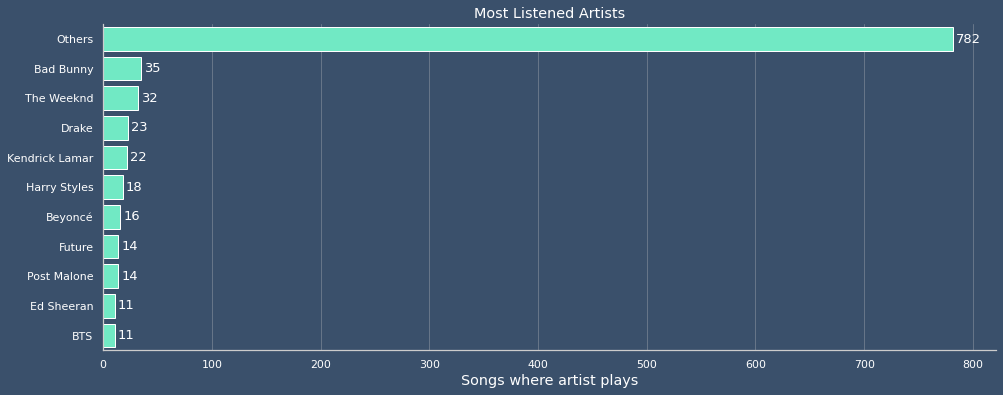

In [ ]:
artists_names = charts_df.artist_names.str.split(',')
all_artist = artists_names.explode().str.strip()
encoder = RareLabelEncoder(max_n_categories=10, tol=0.001, replace_with='Others')
data_to_plot = encoder.fit_transform(all_artist.to_frame(name='artist')).artist.value_counts()

ax = sns.barplot(
    y=data_to_plot.index,
    x=data_to_plot,
    orient='h',
    color=colors[0]
);

ax.set_title('Most Listened Artists')
ax.set_xlabel('Songs where artist plays');
ax.bar_label(ax.containers[0], padding=3, fontsize=13);

<div class='insights'>
    🔑 Insights:
    <ul>
        <li>Musik berubah, Bad Bunny adalah penyanyi Spanyol dan artis dengan lagu terbanyak di tangga lagu.</li>
        <li>BTS yang merupakan band K-pop juga sebagai bagian dari selera generasi baru.</li>
    </ul>
</div>

# Distribution of Numerical Variables of Most Popular Songs

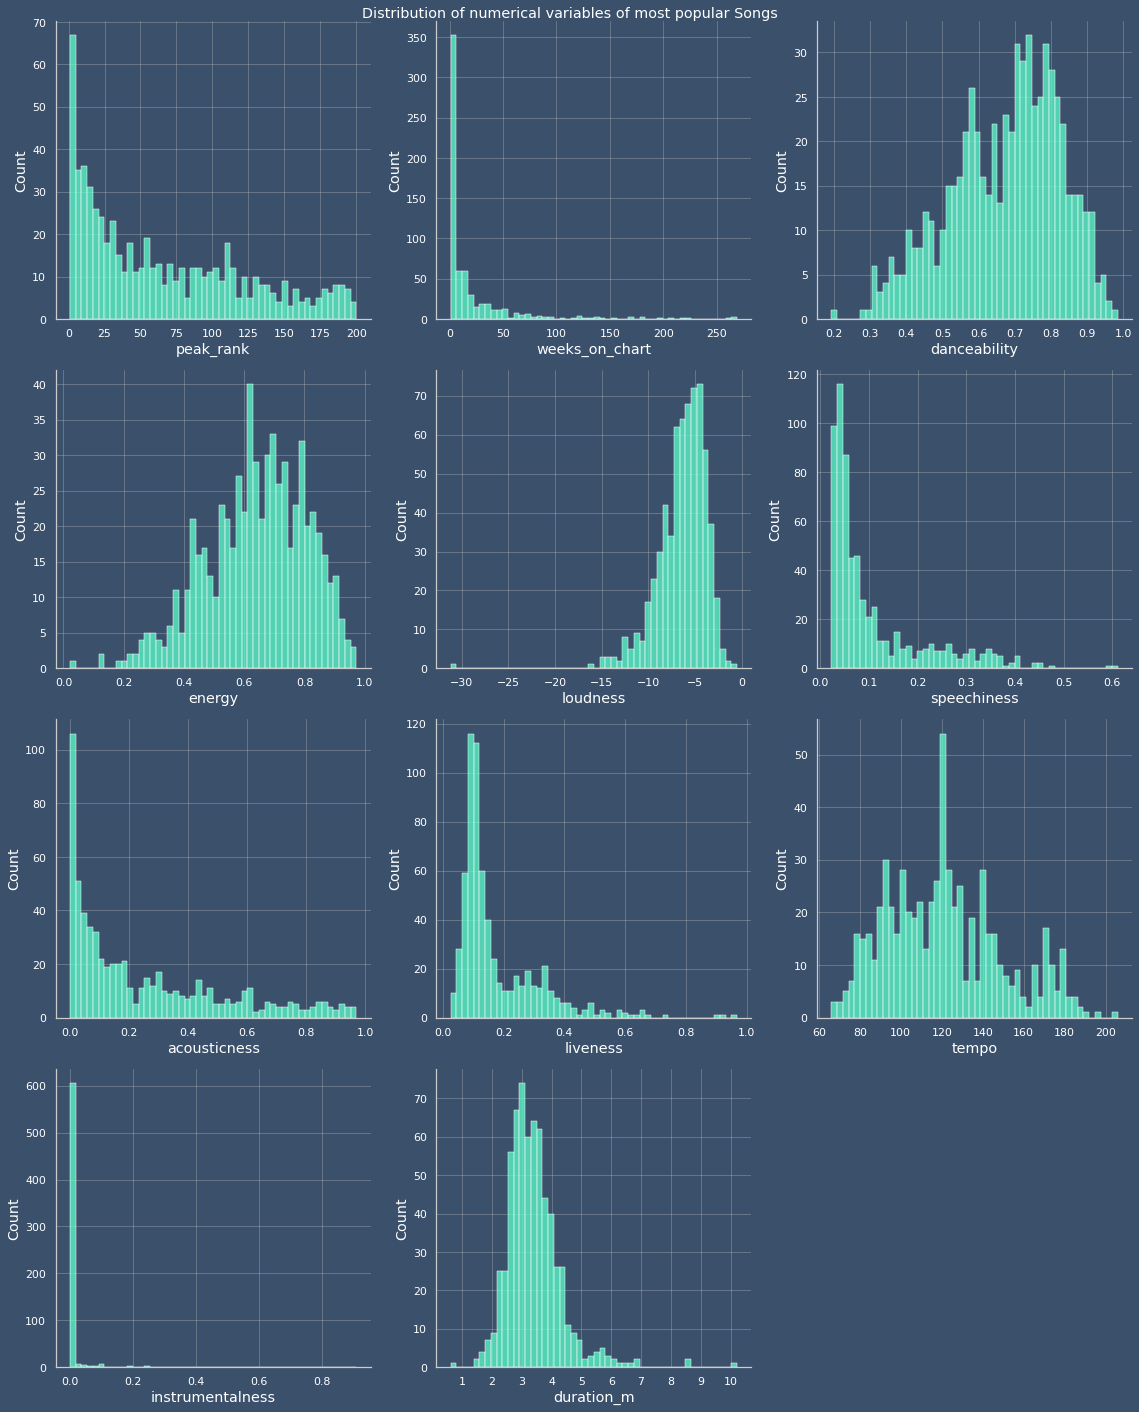

In [ ]:
charts_df['duration_m'] = charts_df.duration_ms.div(1e3).div(60)

numerical_columns = [
    'peak_rank', 'weeks_on_chart','danceability', 'energy',
    'loudness', 'speechiness', 'acousticness', 'liveness',
    'tempo', 'instrumentalness', 'duration_m'
]

no_rows = math.ceil(len(numerical_columns)/3)
fig, ax = plt.subplots(math.ceil(len(numerical_columns)/3), 3, figsize=(16, no_rows*5))
ax = ax.flatten()
axs = {}

for i, column in enumerate(numerical_columns):
    sns.histplot(charts_df[column], ax=ax[i], bins=50)
    axs[column] = ax[i]

axs['duration_m'].xaxis.set_major_locator(ticker.MaxNLocator(11))
ax[-1].set_axis_off()
fig.suptitle('Distribution of numerical variables of most popular Songs');
plt.tight_layout()

<div class='insights'>
    🔑 Insights:
    <ul>
        <li>Peak Rank terpengaruh oleh nilai yang lebih rendah, artinya jika Anda masuk ke dalam chart, kemungkinan besar dapat mencapai tempat yang lebih di sana.</li>
        <li>Weeks on chart juga berpengaruh, artinya sebagian besar lagu tidak akan bertahan lama di tangga lagu.</li>
        <li>Musik di tangga lagu sangat danceable 💃 dan memiliki banyak energi ⚡️</li>
        <li>Musik yang sangat keras seperti hard metal tidak mencapai tangga lagu.</li>
        <li>Lebih banyak musik, lebih sedikit speech, tidak heran mengapa hanya ada beberapa rapper dan artis papan atas dengan lagu terbanyak.</li>
        <li>Musik akustik cenderung tidak mencapai tangga lagu, sama halnya dengan live, jadi orang lebih suka mendengarkan lagu studio.</li>
        <li>Lagu tipikal berdurasi antara 3 dan 5 menit.</li>
    </ul>
</div>

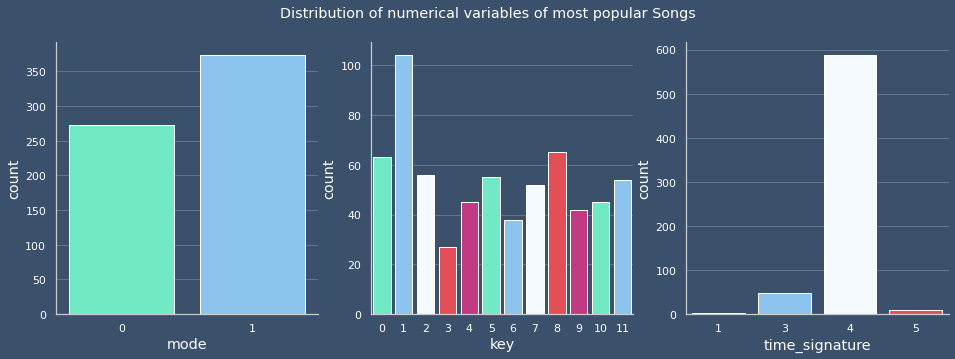

In [ ]:
categorical_columns = ['mode', 'key', 'time_signature']
no_rows = math.ceil(len(categorical_columns)/3)
fig, ax = plt.subplots(math.ceil(len(categorical_columns)/3), 3, figsize=(16, no_rows*5))
ax = ax.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(x=charts_df[column], ax=ax[i], palette=colors)

fig.suptitle('Distribution of numerical variables of most popular Songs');

<div class='insights'>
    🔑 Insights:
    <ul>
        <li>Untuk time_signature dapat kita lihat bahwa musik 4/4 adalah yang paling umum</li>
        <li>Tidak ada kunci tunggal yang bisa mengalahkan kunci lainnya, ini merupakan hal baik karena, variasi itu penting.</li>
        <li>Mode mayor lebih umum daripada mode minor</li>
    </ul>
</div>

# Correlations

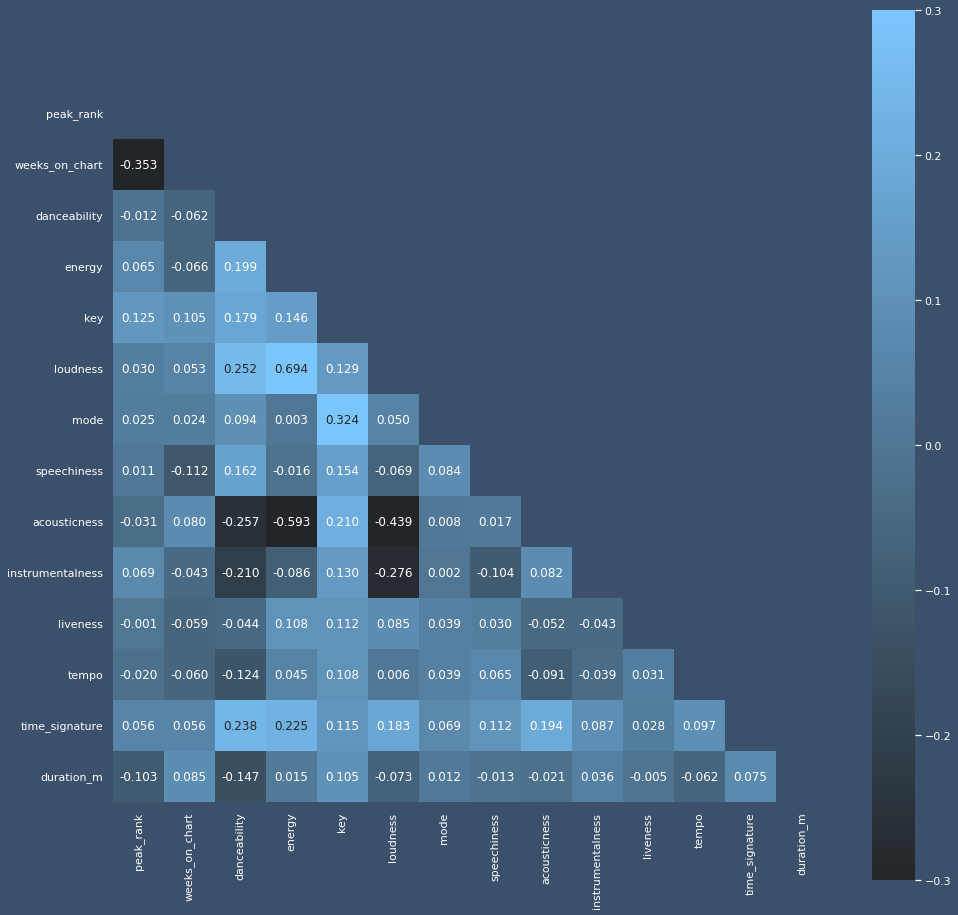

In [ ]:
from dython.nominal import associations

correlations = associations(
    charts_df.drop(columns=['uri', 'artist_names', 'track_name', 'duration_ms']),
    nominal_columns=categorical_columns,
    numerical_columns=numerical_columns,
    cramers_v_bias_correction=False,
    compute_only=True
)

mask = np.triu(np.ones_like(correlations['corr'], dtype=bool))
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(
    correlations['corr'],
    mask=mask,
    cmap=sns.dark_palette(colors[1], as_cmap=True),
    vmax=0.3, vmin=-0.3,
    center=0, annot=True, fmt='.3f',
    square=True, linewidths=0,
    ax=ax
);

for spine in ['bottom', 'right']:
    ax.spines[spine].set_visible(False)

# Top 20 Songs on Spotify 2022

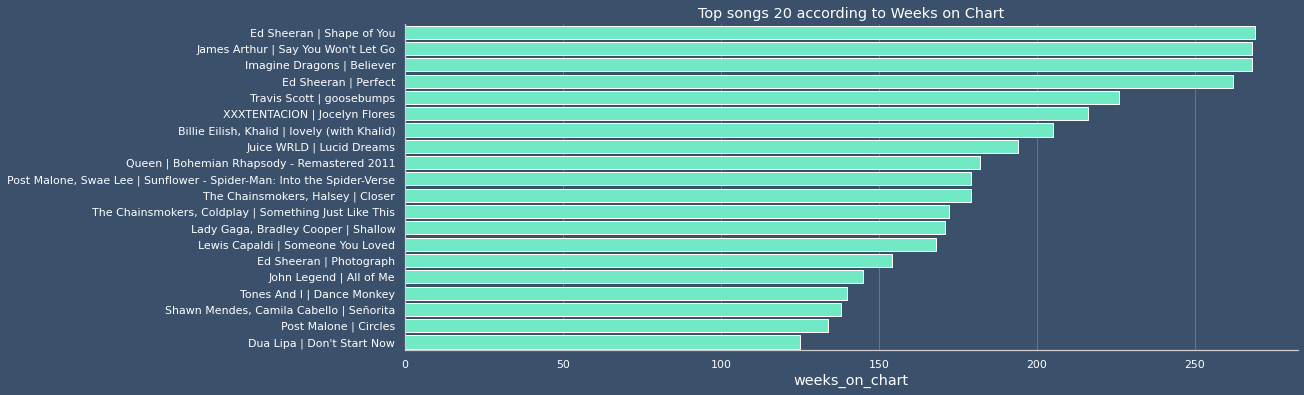

In [ ]:
import datetime
current_week = datetime.datetime.today().isocalendar()[1]
data_to_plot = (
    charts_df
    .sort_values('weeks_on_chart', ascending=False)
    .head(20)
)

y = data_to_plot.artist_names + ' | ' + data_to_plot.track_name
x = data_to_plot.weeks_on_chart

ax = sns.barplot(y=y, x=x, orient='h', color=colors[0])
ax.set_title('Top songs 20 according to Weeks on Chart');

| uri | artist name | song name |
| -- | ----- | --- |
| [spotify:track:7qiZfU4dY1lWllzX7mPBI3](https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3?si=3ce0e097b0554a90) | Ed Sheeran  | Shape of You
| [spotify:track:5uCax9HTNlzGybIStD3vDh](https://open.spotify.com/track/5uCax9HTNlzGybIStD3vDh?si=6d8f84da6f824ef8) | James Arthur  | Say You Won't Let Go
| [spotify:track:0pqnGHJpmpxLKifKRmU6WP](https://open.spotify.com/track/0pqnGHJpmpxLKifKRmU6WP?si=b5d1d7d5cc4c4b9d) | Imagine Dragons  | Believer
| [spotify:track:0tgVpDi06FyKpA1z0VMD4v](https://open.spotify.com/track/0tgVpDi06FyKpA1z0VMD4v?si=bd3447e36b02424f) | Ed Sheeran  | Perfect
| [spotify:track:6gBFPUFcJLzWGx4lenP6h2](https://open.spotify.com/track/6gBFPUFcJLzWGx4lenP6h2?si=89ec6cafac034793) | Travis Scott  | goosebumps
| [spotify:track:7m9OqQk4RVRkw9JJdeAw96](https://open.spotify.com/track/7m9OqQk4RVRkw9JJdeAw96?si=aeaa2619e48b43e5) | XXXTENTACION  | Jocelyn Flores
| [spotify:track:0u2P5u6lvoDfwTYjAADbn4](https://open.spotify.com/track/0u2P5u6lvoDfwTYjAADbn4?si=2e84086403b0410b) | Billie Eilish, Khalid  | lovely (with Khalid)
| [spotify:track:285pBltuF7vW8TeWk8hdRR](https://open.spotify.com/track/285pBltuF7vW8TeWk8hdRR?si=47d09feff7a84ad2) | Juice WRLD  | Lucid Dreams
| [spotify:track:4u7EnebtmKWzUH433cf5Qv](https://open.spotify.com/track/4u7EnebtmKWzUH433cf5Qv?si=68ca72e384a54e94) | Queen  | Bohemian Rhapsody - Remastered 2011
| [spotify:track:0RiRZpuVRbi7oqRdSMwhQY](https://open.spotify.com/track/3KkXRkHbMCARz0aVfEt68P?si=5619264d1d7c4dab) | Post Malone, Swae Lee  | Sunflower - Spider-Man: Into the Spider-Verse
| [spotify:track:7BKLCZ1jbUBVqRi2FVlTVw](https://open.spotify.com/track/7BKLCZ1jbUBVqRi2FVlTVw?si=d98d88af93f344e6) | The Chainsmokers, Halsey  | Closer
| [spotify:track:6RUKPb4LETWmmr3iAEQktW](https://open.spotify.com/track/6RUKPb4LETWmmr3iAEQktW?si=806e42f820604c12) | The Chainsmokers, Coldplay  | Something Just Like This
| [spotify:track:2VxeLyX666F8uXCJ0dZF8B](https://open.spotify.com/track/2VxeLyX666F8uXCJ0dZF8B?si=3455d41f96394755) | Lady Gaga, Bradley Cooper  | Shallow
| [spotify:track:7qEHsqek33rTcFNT9PFqLf](https://open.spotify.com/track/7qEHsqek33rTcFNT9PFqLf?si=9696834ffb864e3f) | Lewis Capaldi  | Someone You Loved
| [spotify:track:6fxVffaTuwjgEk5h9QyRjy](https://open.spotify.com/track/1HNkqx9Ahdgi1Ixy2xkKkL?si=b946c0370717466d) | Ed Sheeran  | Photograph
| [spotify:track:3U4isOIWM3VvDubwSI3y7a](https://open.spotify.com/track/3U4isOIWM3VvDubwSI3y7a?si=bfbd56c6a9d247ff) | John Legend  | All of Me
| [spotify:track:2N8m6CYs74qQO4mjVcXO30](https://open.spotify.com/track/2XU0oxnq2qxCpomAAuJY8K?si=3adb952020c5479a) | Tones And I  | Dance Monkey
| [spotify:track:6v3KW9xbzN5yKLt9YKDYA2](https://open.spotify.com/track/0TK2YIli7K1leLovkQiNik?si=bcf52a7aeacb44ed) | Shawn Mendes, Camila Cabello  | Señorita
| [spotify:track:21jGcNKet2qwijlDFuPiPb](https://open.spotify.com/track/21jGcNKet2qwijlDFuPiPb?si=6599de455d594101) | Post Malone  | Circles
| [spotify:track:3PfIrDoz19wz7qK7tYeu62](https://open.spotify.com/track/2FlcxnvybdwpaMmMhaRtSN?si=f952264c22d74112) | Dupa lipa | Don't Start Now
